done with heur4, pt1
done with heur4, pt2
done with heur3


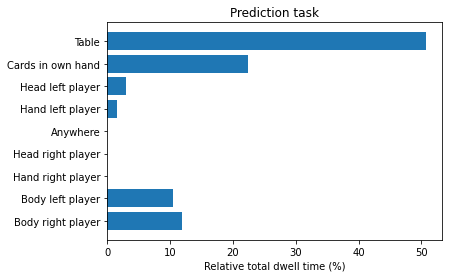

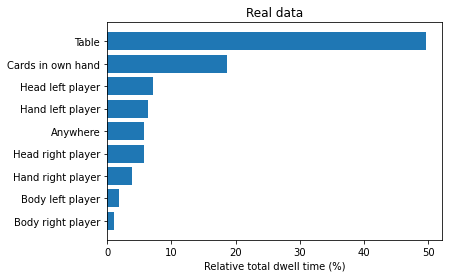

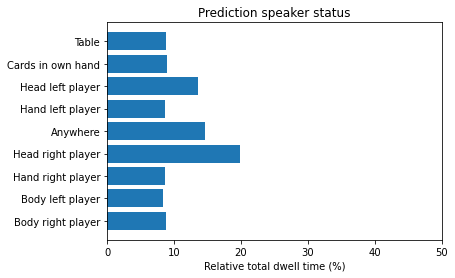

      Body right player  Body left player  Hand right player  \
Real           1.052632          1.894737           3.789474   

      Head right player  Anywhere  Hand left player  Head left player  \
Real           5.684211  5.684211          6.315789          7.157895   

      Cards in own hand      Table  
Real          18.736842  49.684211  
          Body right player  Body left player  Hand right player  \
Real               1.052632          1.894737           3.789474   
SpeakMod           8.808446          8.337858           8.561086   
TaskMod           11.940299         10.447761          12.777740   

          Head right player   Anywhere  Hand left player  Head left player  \
Real               5.684211   5.684211          6.315789          7.157895   
SpeakMod          19.764706  14.654600          8.705882         13.508296   
TaskMod           29.499561  21.872538          1.492537          2.985075   

          Cards in own hand      Table  
Real              18.73

In [10]:
import numpy as np
import random as rm
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from collections import Counter

################################### Real gaze data ##################################################
#variables
y_value_names = ['Body right player', 'Body left player', 'Hand right player', 'Head right player', 'Anywhere', 'Hand left player', 'Head left player', 'Cards in own hand', 'Table']
GraphDict = {'Body right player': None , 'Body left player': None, 'Hand right player': None, 'Head right player': None, 'Anywhere': None, 'Hand left player': None, 'Head left player' : None, 'Cards in own hand': None, 'Table': None}

#READ IN ELAN TASK DATA
column_names = ["start", "end", "task"]
taskdata = pd.read_csv("C:\\Users\\Aisha\\Documents\\Python code\\annotation data task.txt", sep ="\t", usecols = (1,2,4), names = column_names, keep_default_na=False)
starttimestask = np.array(taskdata.start)
endtimesstask = np.array(taskdata.end)
taskletters = taskdata.task.to_list()

#READ IN REAL GAZE FIXATION DATA
gazedata = pd.read_csv("C:\\Users\\Aisha\\Documents\\Python code\\Fixaties_Clean.tsv", sep ="\t")
gazepoints = gazedata.fixaties.to_list()
gazepoints.pop(0)

#functie die nrs naar text verandert voor de bar chart
def nrstotext(nrsdata):
    for i, elem in enumerate(nrsdata):
        if elem == 1:
            nrsdata[i] = 'Hand left player'
        if elem == 2:
            nrsdata[i] = 'Cards in own hand'
        if elem == 3:
            nrsdata[i] = 'Hand right player'
        if elem == 4:
            nrsdata[i] = 'Body left player'
        if elem == 5:
            nrsdata[i] = 'Table'
        if elem == 6:
            nrsdata[i] = 'Body right player'
        if elem == 7:
            nrsdata[i] = 'Head left player'
        if elem == 8:
            nrsdata[i] = 'Anywhere'
        if elem == 9:
            nrsdata[i] = 'Head right player'
    return nrsdata

#Change Str to int gaze fixation data lists
gazepoints = [int(i) for i in gazepoints] 
gazepoints = nrstotext(gazepoints)



########################################prediction for task######################################################3 
predtaskcat = []
for i, elem in enumerate(taskletters):
        if elem == 'WLP':
            predtaskcat.append('Body left player')
        if elem == 'WRP':
            predtaskcat.append('Body right player')
        if elem == 'WDL':
            predtaskcat.append('Hand left player')
        if elem == 'GH':
            predtaskcat.append('Cards in own hand')
        if elem == 'PH':
            predtaskcat.append('Cards in own hand')
        if elem == 'NH':
            predtaskcat.append(rm.choice(y_value_names))
        if elem == 'GT':
            predtaskcat.append('Table')
        if elem == 'PT':
            predtaskcat.append('Table')
        if elem == 'ECT':
            predtaskcat.append('Table')
        if elem == 'CD':
            predtaskcat.append('Table')
        if elem == 'EAT':
            predtaskcat.append('Table')
        if elem == 'DC':
            predtaskcat.append('Table')
        if elem == 'NA':
            predtaskcat.append('Table')  
            
##################### prediction for speaker status ######################################
#variables
par1 = 400
amountindx1 = int(par1/20)
heur3= 1
unflatlst = []
outputlst = []
mypredspeak = []
rand_idx = []
newcat = []
r = [1, 2, 3, 4, 5, 6, 8] #list range for when 1 speaks

#gaze location numbers
headleft = 7
headright = 9
anywhere = 8 

#READ IN ELAN SPEAKER STATUS DATA
column_names = ["start", "end", "speaker"]
speakdata = pd.read_csv("C:\\Users\\Aisha\\Documents\\Python code\\Speaker_Status_Clean.tsv", sep ="\t", usecols = (1,2,4), names = column_names)
starttimesspeak = speakdata.start.to_list()
endtimesspeak = speakdata.end.to_list()
speakletters = speakdata.speaker.to_list()
starttimesspeak.pop(0)
endtimesspeak.pop(0)
speakletters.pop(0)

#Change Str to int gaze fixation data lists
endtimesspeak = [int(i) for i in endtimesspeak]
starttimesspeak = [int(i) for i in starttimesspeak] 


#change letters of speaker to numerical categories.
speakcategories = []
for i, cat in enumerate(speakletters):
    #print(i, cat)
    if cat.strip() == 'E':
        speakcategories.append(1)
        #print(cat, speakcategories[-1], len(speakcategories))
    elif cat.strip() == 'L':
        speakcategories.append(2)
        #print(cat, speakcategories[-1],  len(speakcategories))
    elif cat.strip() == 'R':
        speakcategories.append(3)
        #print(cat, speakcategories[-1],  len(speakcategories))
    elif cat.strip() == 'N':
        speakcategories.append(4)
        #print(cat, speakcategories[-1],  len(speakcategories))
    elif cat.strip() == 'Re':
        speakcategories.append(5)
        #print(cat, speakcategories[-1],  len(speakcategories))
    elif cat.strip() == 'P':
        speakcategories.append(6)
        #print(cat, speakcategories[-1],  len(speakcategories))
    else:
        print("somethings wrong")

def samplesignal(start, end, categories):
    timeframes = [*range(0, end[-1]+20,20)]
    newcatzeros = [[0]*len(timeframes)]
    newcatpre = [item for sublist in newcatzeros for item in sublist]
    newcat = []
    arrstarttimes = np.array(start)
    arrendtimes = np.array(end)
    arrtimeframes = np.array(timeframes)
    arrcategories = np.array(categories)
    for i in range(len(timeframes)):    
        qstart = arrtimeframes[i] >= arrstarttimes
        qend = arrtimeframes[i] < arrendtimes
        whichepisode = qstart & qend
        #print("whichepisode:", len(whichepisode), "speakcat:", arrspeakcategories)
        newcatpre[i] = arrcategories[whichepisode]
    newcat = np.concatenate(newcatpre).ravel().tolist()
    return newcat

newcatspeak = samplesignal(starttimesspeak, endtimesspeak, speakcategories)

for elem in newcatspeak:
    if elem == 1:
        mypredspeak.append(rm.choice(r))
    if elem == 2:
        mypredspeak.append(headleft)
    if elem == 3:
        mypredspeak.append(headright)
    if elem == 4:
        mypredspeak.append(rm.randint(1,9)) 
    if elem == 5 or elem == 6: 
        mypredspeak.append(anywhere)      


#heuristic 4   (If S speaks, S looks at addressees for 60% of the time)  
def perccalculations(index, i, next_e):
                lengte = len(range(index, i))#length of the range of 1's
                doneperc1 = amountindx1 / lengte #calculate which percentage will be dealt with by heuristic 
                doneperc2 = telrandom(next_e, lengte, index+1, i) #calculate which percentage will be done with heur1
                perc = (60 - doneperc1 - doneperc2) / 100        #calculate percentage which still needs to be handled
                amountnrs = int(lengte * perc)      #calculate the amount of index numbers that need to be changed
                return amountnrs
            
def telrandom(nextspeak, lengte, ondgrens, bovgrens):
    teller = 0
    for i in range(ondgrens, bovgrens):
        if mypredspeak[i] == nextspeak:
            teller += 1
    if teller != 0:
        return teller/lengte
    else:
        return teller
       
def heur4(nextspeak, gazedir):
    for i, (e, next_e) in enumerate(zip(newcatspeak, newcatspeak[1:])):
        if e == 1 and next_e == nextspeak:
            #print("in de if statement")
            rand_idx = []
            amountnrs = 0
            lengte = 0
            doneperc1 = 0
            doneperc2 = 0 
            perc = 0
            for index in reversed(range(i)):
                #print("in de reversed loop om range te vinden")
                if index == 0: #search for index number when it's not 1 anymore
                    amountnrs = perccalculations(index, i, next_e)
                    break
                if newcatspeak[index] != 1: #search for index number when it's not 1 anymore
                    amountnrs = perccalculations(index+1, i, next_e)            
                    break
            for _ in range(amountnrs):
                #print("in de amountnrs loop ", index+1, i-amountindx1)
                if lengte <= 20:
                    rand_idx.append(rm.randint(index+1, i))#create a list of random indexnrs that need t
                #de i- amountindx is te klein waardoor het niet meer werkt. 
                else:
                    rand_idx.append(rm.randint(index+1, i-amountindx1))
            #print(rand_idx)
            for a in rand_idx:
                #print("in de toekenningsloop")
                mypredspeak[a] = gazedir
            
heur4(2, 7)
print("done with heur4, pt1")
heur4(3, 9)
print("done with heur4, pt2")


#heuristic 3 (400ms before S stops speaking, S looks at next speaker)
for start, end in zip(starttimesspeak, endtimesspeak):
    if end - start > 400:   
        for i, (e, next_e) in enumerate(zip(newcatspeak, newcatspeak[1:])):
            if heur3 >= amountindx1 and next_e == 2:
                for index in range(i, i-amountindx1, -1):                      
                    mypredspeak[index]= headleft
                heur3 = 1
            if heur3 >= amountindx1 and next_e == 3:
                for index in range(i, i-amountindx1, -1):
                    mypredspeak[index]= headright
                heur3 = 1
            if e == 1 and next_e == 1:
                heur3 += 1
            else: 
                heur3 = 1
                
print("done with heur3") 

for i, elem in enumerate(mypredspeak):
    if elem == 1:
        mypredspeak[i] = 'Hand left player'
    if elem == 2:
        mypredspeak[i] = 'Cards in own hand'
    if elem == 3:
        mypredspeak[i] = 'Hand right player'
    if elem == 4:
        mypredspeak[i] = 'Body left player'
    if elem == 5:
        mypredspeak[i] = 'Table'
    if elem == 6:
        mypredspeak[i] = 'Body right player'
    if elem == 7:
        mypredspeak[i] = 'Head left player'
    if elem == 8:
        mypredspeak[i] = 'Anywhere'
    if elem == 9:
        mypredspeak[i] = 'Head right player'

########################## graph creation ##############################
            
#functie wat de aantallen telt
def tellijst(catlst):
    countdict =[]
    countdict = Counter(catlst)
    for key, value in countdict.items():
        GraphDict[key] = value
    countdict = GraphDict
    return countdict

#functie die het percentage van de dwell times berekent
def Perc_Dwell(countdict, total):
    x_as_vals = countdict.values()
    for key, value in countdict.items():
        if value is not None:
            countdict[key] = (value/total)*100
        else:
            countdict[key] = 0
    return countdict.values()


    
def plotcreation(data, titel, plottitel):
    countdict = tellijst(data)
    Y = list(countdict.keys())
    X = list(Perc_Dwell(countdict, len(data)))
    plt.barh(Y,X) #voeg keys van dict toe 
    plt.xlabel('Relative total dwell time (%)')
    plt.xticks(np.arange(0,60, 10))
    plt.title(titel)
    plt.savefig(plottitel)
    plt.show()

    
def stats(data):
    countdict = tellijst(data)
    keys = list(countdict.keys())
    values = list(Perc_Dwell(countdict, len(data)))
    dct = dict(zip(keys, values))
    return dct


    
################################### Formulas ###########################
plotcreation(predtaskcat, "Prediction task", "Task fig")
plotcreation(gazepoints, "Real data", "Real data fig")
plotcreation(mypredspeak, "Prediction speaker status", "Speaker status fig")



###stats resultaten #######
taskperc = stats(predtaskcat)
speakperc = stats(mypredspeak)
realperc = stats(gazepoints)

## create dataframes ##
realdf = pd.DataFrame(realperc, index=['Real',])
speakdf = pd.DataFrame(speakperc, index=['SpeakMod',])
taskdf = pd.DataFrame(taskperc, index=['TaskMod',])
print(realdf)

##merge
frames = [realdf, speakdf, taskdf]
result = pd.concat(frames)
print(result)
result.to_csv(r'C:\Users\Aisha\Documents\Master Thesis\Testdf.csv', index = False)

In [6]:
import numpy as np
import random as rm
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

################################# Speaker Status ####################################
#HEURISTICS
#heuristic 1 (When others speak, S looks at speaker)
#heuristic 2 (if S starts speaking, S gaze is averted)
#heuristic 5 (if no one speaks, S looks elsewhere)
#heuristic 4 (If S speaks, S looks at addressees for 60% of the time)  
#heuristic 3 (400ms before S stops speaking, S looks at next speaker)

#variables
par1 = 400
amountindx1 = int(par1/20)
heur3= 1
unflatlst = []
outputlst = []
mypred = []
rand_idx = []
newcat = []
speakcategories = []
eye_tracker_speaklist = ['Body right player', 'Body left player', 'Hand right player', 'Anywhere', 'Hand left player', 'Cards in own hand', 'Table']
y_value_names = ['Body right player', 'Body left player', 'Hand right player', 'Head right player', 'Anywhere', 'Hand left player', 'Head left player', 'Cards in own hand', 'Table']

#gaze location numbers
headleft = 7
headright = 90
anywhere = 8 

print(y_value_names[2])

print(len(speakletters))

#speakcategories = [item for sublist in speakcategories for item in sublist]
print(len(speakcategories), speakcategories)

#heuristic 4   (If S speaks, S looks at addressees for 60% of the time)  
def perccalculations(index, i, next_e):
                lengte = len(range(index, i))#length of the range of 1's
                doneperc1 = amountindx1 / lengte #calculate which percentage will be dealt with by heuristic 
                doneperc2 = telrandom(next_e, lengte, index+1, i) #calculate which percentage will be done with heur1
                perc = (60 - doneperc1 - doneperc2) / 100        #calculate percentage which still needs to be handled
                amountnrs = int(lengte * perc)      #calculate the amount of index numbers that need to be changed
                return amountnrs
            
def telrandom(nextspeak, lengte, ondgrens, bovgrens):
    teller = 0
    for i in range(ondgrens, bovgrens):
        if mypred[i] == nextspeak:
            teller += 1
    if teller != 0:
        return teller/lengte
    else:
        return teller
       
def heur4(nextspeak, gazedir):
    for i, (e, next_e) in enumerate(zip(speakletters, speakletters[1:])):
        if e == 'E' and next_e == nextspeak:
            #print("in de if statement")
            rand_idx = []
            amountnrs = 0
            lengte = 0
            doneperc1 = 0
            doneperc2 = 0 
            perc = 0
            for index in reversed(range(i)):
                #print("in de reversed loop om range te vinden")
                if index == 0: #search for index number when it's not 1 anymore
                    amountnrs = perccalculations(index, i, next_e)
                    break
                if newcatspeak[index] != 'E': #search for index number when it's not 1 anymore
                    amountnrs = perccalculations(index+1, i, next_e)            
                    break
            for _ in range(amountnrs):
                #print("in de amountnrs loop ", index+1, i-amountindx1)
                if lengte <= 20:
                    rand_idx.append(rm.randint(index+1, i))#create a list of random indexnrs that need t
                #de i- amountindx is te klein waardoor het niet meer werkt. 
                else:
                    rand_idx.append(rm.randint(index+1, i-amountindx1))
            #print(rand_idx)
            for a in rand_idx:
                #print("in de toekenningsloop")
                mypred[a] = gazedir
            
heur4('L', 'Head left player')
print("done with heur4, pt1")
heur4('R', 'Head right player')
print("done with heur4, pt2")


#heuristic 3 (400ms before S stops speaking, S looks at next speaker)
for start, end in zip(starttimesspeak, endtimesspeak):
    if end - start > 400:   
        for i, (e, next_e) in enumerate(zip(speakletters, speakletters[1:])):
            if heur3 >= amountindx1 and next_e == 'L':
                for index in range(i, i-amountindx1, -1):                      
                    mypred[index]= headleft
                heur3 = 1
            if heur3 >= amountindx1 and next_e == 'R':
                for index in range(i, i-amountindx1, -1):
                    mypred[index]= headright
                heur3 = 1
            if e == 1 and next_e == 1:
                heur3 += 1
            else: 
                heur3 = 1
                
print("done with heur3") 
print(len(mypred), len(newcatgaze))

Hand right player
115
115 ['Hand right player', 'Hand left player', 'Body right player', 'Head left player', 'Head left player', 'Head left player', 'Head Right player', 'Hand left player', 'Anywhere', 'Body right player', 'Head Right player', 'Body right player', 'Hand right player', 'Table', 'Head left player', 'Hand right player', 'Head left player', 'Table', 'Body right player', 'Head left player', 'Anywhere', 'Body right player', 'Anywhere', 'Anywhere', 'Head Right player', 'Cards in own hand', 'Body left player', 'Cards in own hand', 'Body right player', 'Anywhere', 'Head right player', 'Body left player', 'Head left player', 'Hand left player', 'Head right player', 'Hand right player', 'Hand right player', 'Head Right player', 'Body left player', 'Head left player', 'Head Right player', 'Hand right player', 'Cards in own hand', 'Body left player', 'Head Right player', 'Table', 'Head right player', 'Body right player', 'Head left player', 'Hand left player', 'Head left player', '